In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame({
    'x': iris.data[:, 0],
    'y': iris.data[:, 1],
    'cluster': iris.target
})

In [ ]:
df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
centroid_cnt = len(set(df['cluster']))

In [ ]:
centroids = {}

for i in range(centroid_cnt):
    centroid = [df.loc[i]['x'], df.loc[i]['y']]
    centroids[i] = centroid

# for i in range(len(set(df['cluster']))):
#     centroid = []
#     centroid.append()

In [ ]:
centroids

{0: [5.1, 3.5], 1: [4.9, 3.0], 2: [4.7, 3.2]}

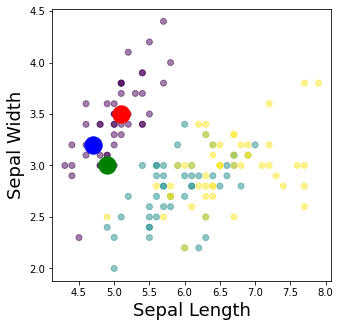

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], c = df['cluster'], alpha=0.5)
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

colmap = {0: 'r', 1: 'g', 2: 'b'}
for i in range(3):
    plt.scatter(centroids[i][0], centroids[i][1], c=colmap[i], marker='o', s = 300)
plt.show()

In [ ]:
def assignment(df, centroids):

    colmap = {0: 'r', 1: 'g', 2: 'b'}
    
    for i in range(centroid_cnt):
        df[f'distance_from_{i}'] = np.sqrt(
            np.power(df['x']-centroids[i][0], 2) + np.power(df['y']-centroids[i][1], 2)
        )
    
    centroid_dist_cols = [f'distance_from_{i}' for i in range(centroid_cnt)]

    df['closest'] = df.loc[:, centroid_dist_cols].idxmin(axis=1)
    df['closest'] = df['closest'].apply(lambda x: int(x.lstrip('distance_from_')))

    df['color'] = df['closest'].apply(lambda x : colmap[x])

    return df

In [ ]:
df = assignment(df, centroids)

In [ ]:
df.head()

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.000000,0.538516,0.500000,0,r
1,4.9,3.0,0,0.538516,0.000000,0.282843,1,g
2,4.7,3.2,0,0.500000,0.282843,0.000000,2,b
3,4.6,3.1,0,0.640312,0.316228,0.141421,2,b
4,5.0,3.6,0,0.141421,0.608276,0.500000,0,r


In [ ]:
def update(df, centroids):
  
    for i in range(3):
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][0] = np.mean(df[df['closest'] == i]['y'])
    
    return centroids

In [ ]:
cnt = 0
while cnt < 10:
    cnt += 1
    closest_centroids = df['closest'].copy(deep=True)

    df = assignment(df, centroids)

    centroids = update(df, centroids)

    print(centroids)

    # if(closest_centroids.equals(df['closest'])):
    #     break

print(cnt)

{0: [3.2602272727272736, 3.5], 1: [2.6530612244897958, 3.0], 2: [3.207692307692308, 3.2]}
{0: [3.2670000000000017, 3.5], 1: [nan, 3.0], 2: [2.638, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}
10


In [ ]:
def plot_custom_figure(df, centroids):
  
    fig = plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], c = df['color'], alpha=0.5)
    plt.xlabel('Sepal Length', fontsize=18)
    plt.ylabel('Sepal Width', fontsize=18)

    colmap = {0: 'r', 1: 'g', 2: 'b'}
    for i in range(3):
        plt.scatter(centroids[i][0], centroids[i][1], c=colmap[i], marker='o', s = 300)
    plt.show()

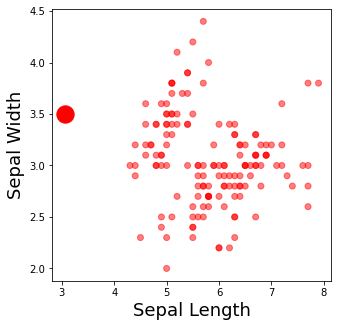

In [ ]:
plot_custom_figure(df, centroids)

In [ ]:
centroids

{0: [3.057333333333334, 3.5], 1: [nan, 3.0], 2: [nan, 3.2]}

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import random as rd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


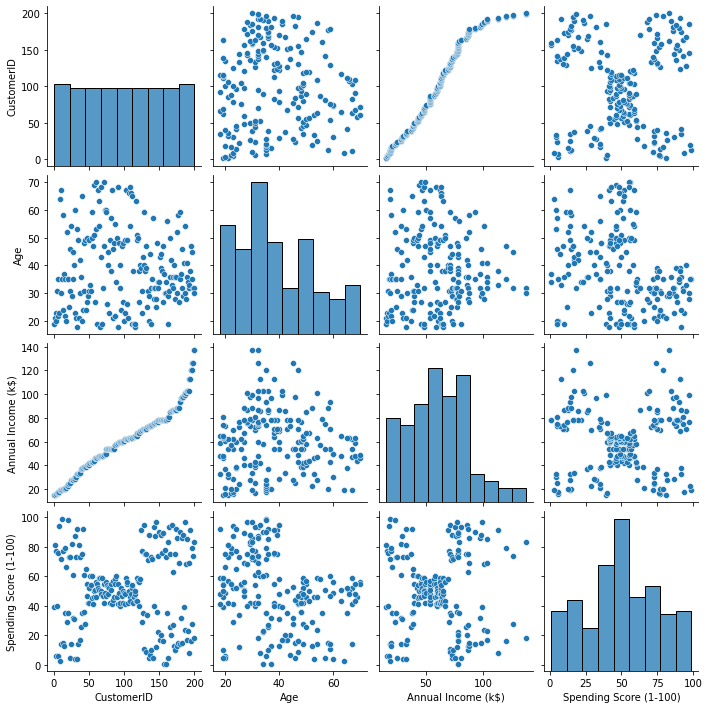

In [ ]:
sns.pairplot(df)

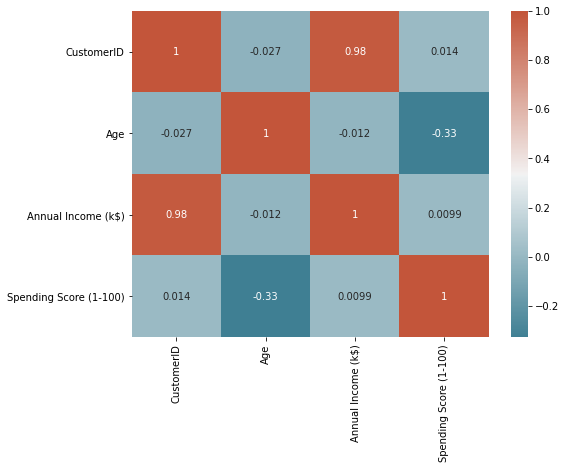

In [ ]:
corr = df.corr()
plt.subplots(figsize=(8, 6))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
X = df.iloc[:, [3, 4]].values

In [ ]:
# m, n = X.shape
m = X.shape[0]
n = X.shape[1]

In [ ]:
print(m, n)

200 2


In [ ]:
k = 5 #Cluster count
output = {}

In [ ]:
centroids = np.array([]).reshape(n, 0)

In [ ]:
for i in range(k):
    rand = rd.randint(0, m-1)
    centroids = np.c_[centroids, X[rand]]

centroids

array([[113.,  23.,  46.,  98.,  67.],
       [ 91.,  98.,  55.,  15.,  56.]])

In [ ]:
for i in range(100):
    EuclideanDistance = np.array([]).reshape(m, 0)
    for j in range(k):
        tempDist = np.sum((X-centroids[:, j])**2, axis=1)
        EuclideanDistance = np.c_[EuclideanDistance, tempDist]
        C = np.argmin(EuclideanDistance, axis=1)+1
    Y = {}
    for j in range(k):
        Y[j+1] = np.array([]).reshape(2, 0)
    for j in range(m):
        Y[C[j]] = np.c_[Y[C[j]], X[j]]
    for j in range(k):
        Y[j+1] = Y[j+1].T
    for j in range(k):
        centroids[:, j] = np.mean(Y[j+1], axis=0)
    output = Y


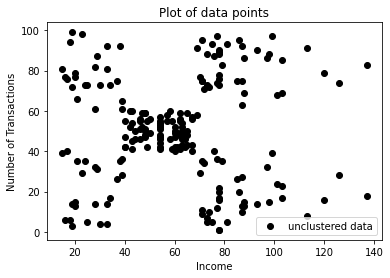

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='black', label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of Transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

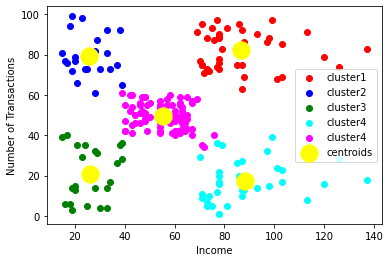

In [ ]:
color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster4']
for j in range(k):
    plt.scatter(output[j+1][:, 0], output[j+1][:, 1], c=color[j], label=labels[j])
plt.scatter(centroids[0, :], centroids[1, :], s=300, c='yellow', label='centroids')
plt.xlabel('Income')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

In [ ]:
# type(output)
print(output.keys())
print(output.values())

dict_keys([1, 2, 3, 4, 5])
dict_values([array([[ 69.,  91.],
       [ 70.,  77.],
       [ 71.,  95.],
       [ 71.,  75.],
       [ 71.,  75.],
       [ 72.,  71.],
       [ 73.,  88.],
       [ 73.,  73.],
       [ 74.,  72.],
       [ 75.,  93.],
       [ 76.,  87.],
       [ 77.,  97.],
       [ 77.,  74.],
       [ 78.,  90.],
       [ 78.,  88.],
       [ 78.,  76.],
       [ 78.,  89.],
       [ 78.,  78.],
       [ 78.,  73.],
       [ 79.,  83.],
       [ 81.,  93.],
       [ 85.,  75.],
       [ 86.,  95.],
       [ 87.,  63.],
       [ 87.,  75.],
       [ 87.,  92.],
       [ 88.,  86.],
       [ 88.,  69.],
       [ 93.,  90.],
       [ 97.,  86.],
       [ 98.,  88.],
       [ 99.,  97.],
       [101.,  68.],
       [103.,  85.],
       [103.,  69.],
       [113.,  91.],
       [120.,  79.],
       [126.,  74.],
       [137.,  83.]]), array([[15., 81.],
       [16., 77.],
       [17., 76.],
       [18., 94.],
       [19., 72.],
       [19., 99.],
       [20., 77.],
      